<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Motor Gestures Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [1]:
# the following line enable interact with figures, 
# you can make zoom and save images from a poup matplotlib window
#notebook qt ipympl tk qt
%matplotlib ipympl

import birdsongs as bs
from birdsongs.utils import *

Define paths and ploter objects. Select file number

In [2]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
# audios_path = "C:\\Users\\sebas\\Documents\\GitHub\\audios\\Dissertation-xeno\\"

paths  = bs.Paths()              # root_path, audios_path, bird_name
ploter = bs.Ploter(save=False)   # to save figures save=True 
paths.ShowFiles()
no_file = 1 # int(input("Enter the number of song (1 to {0}): ".format(paths.no_files)))

The folder has 4 songs:
0-humman.wav
1-XC104508 - Ocellated Tapaculo - Acropternis orthonyx.wav
2-XC11293 - Rufous-collared Sparrow - Zonotrichia capensis.wav
3-XC513182 - Rufous-collared Sparrow - Zonotrichia capensis.wav


Define the birdsong object and select the time interval of interest (syllable)

C:\Users\sebas\anaconda3\lib\site-packages\maad\sound\input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


The son has 36 syllables


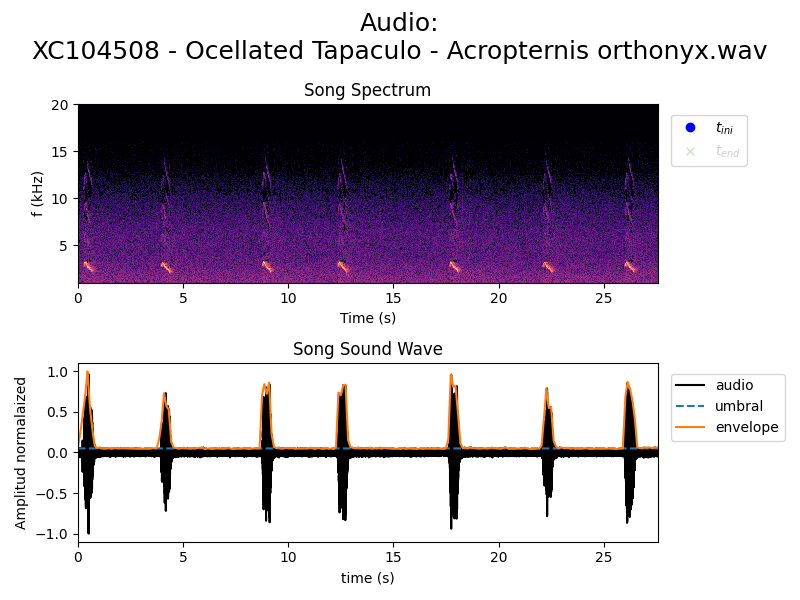

In [3]:
birdsong = bs.BirdSong(paths, no_file=no_file, Nt=5000, umbral=0.05, 
                       flim=(1e3,20e3), split_method="amplitud")
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
#klicker = ploter.FindTimes(birdsong, FF_on=False)

Define the syllable object

In [4]:
%%time
# time_interval = Positions(ploter.klicker)[0]
time_interval = np.array([3.9106138 , 4.36835408])
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1., Nt=30)

Time interval selected: initial time 3.9106 s, final time 4.3684 s
Wall time: 7.01 s


In [5]:
time_interval

array([3.9106138 , 4.36835408])

Visualize and hear the objects defined, birdsong and syllable 

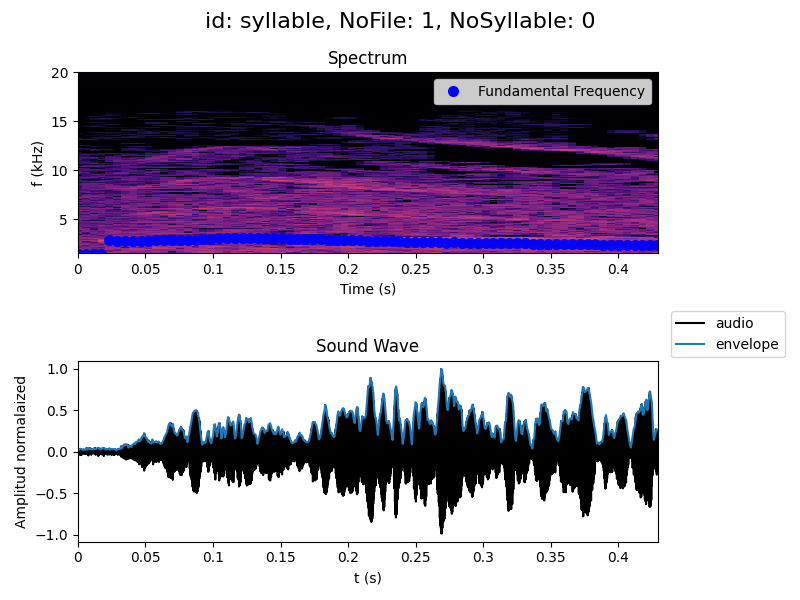

In [6]:
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

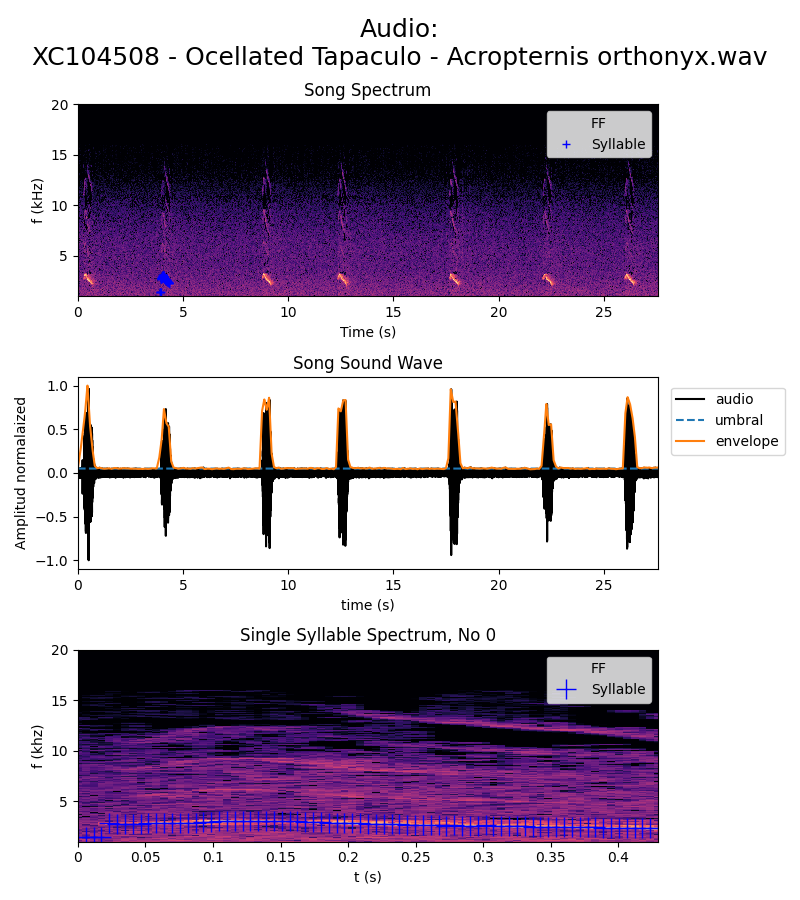

In [7]:
birdsong.syllable = syllable
birdsong.no_syllable = 0
ploter.Plot(birdsong, FF_on=False, syllable_on=True) # syllable=False

# Varying Parameters

## Air Sac Pressure

### Low

$ a_0 = 0.01 $

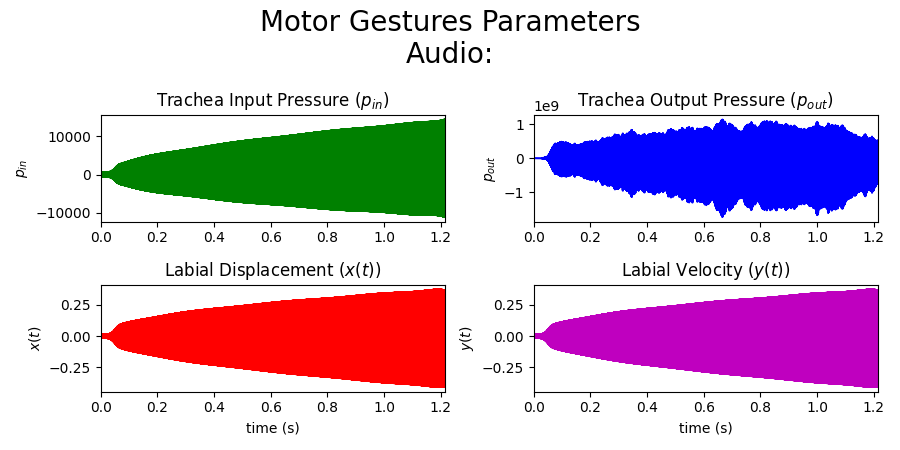

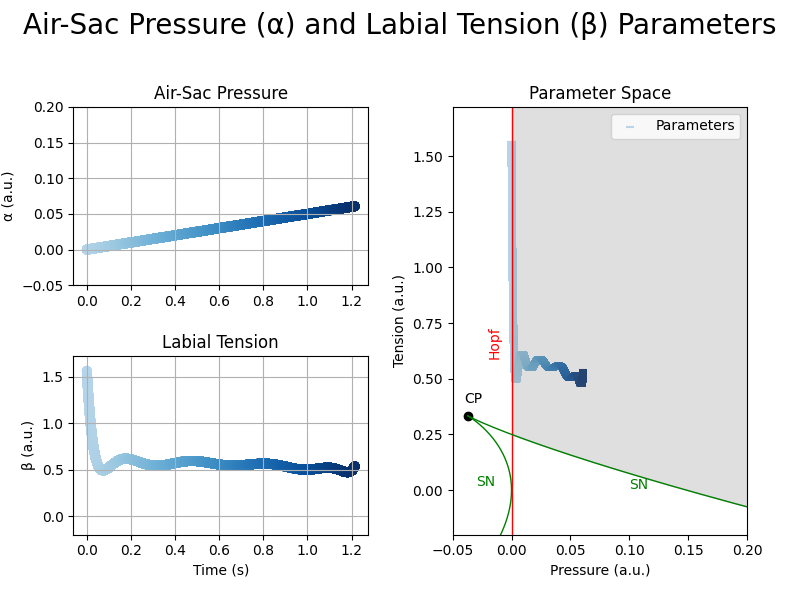

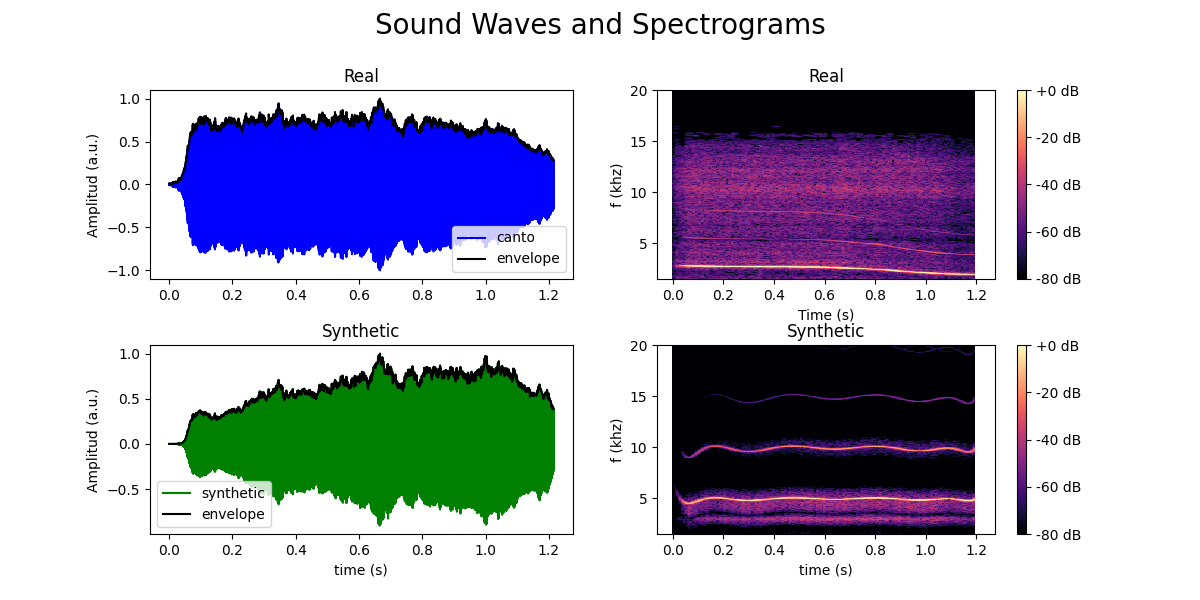

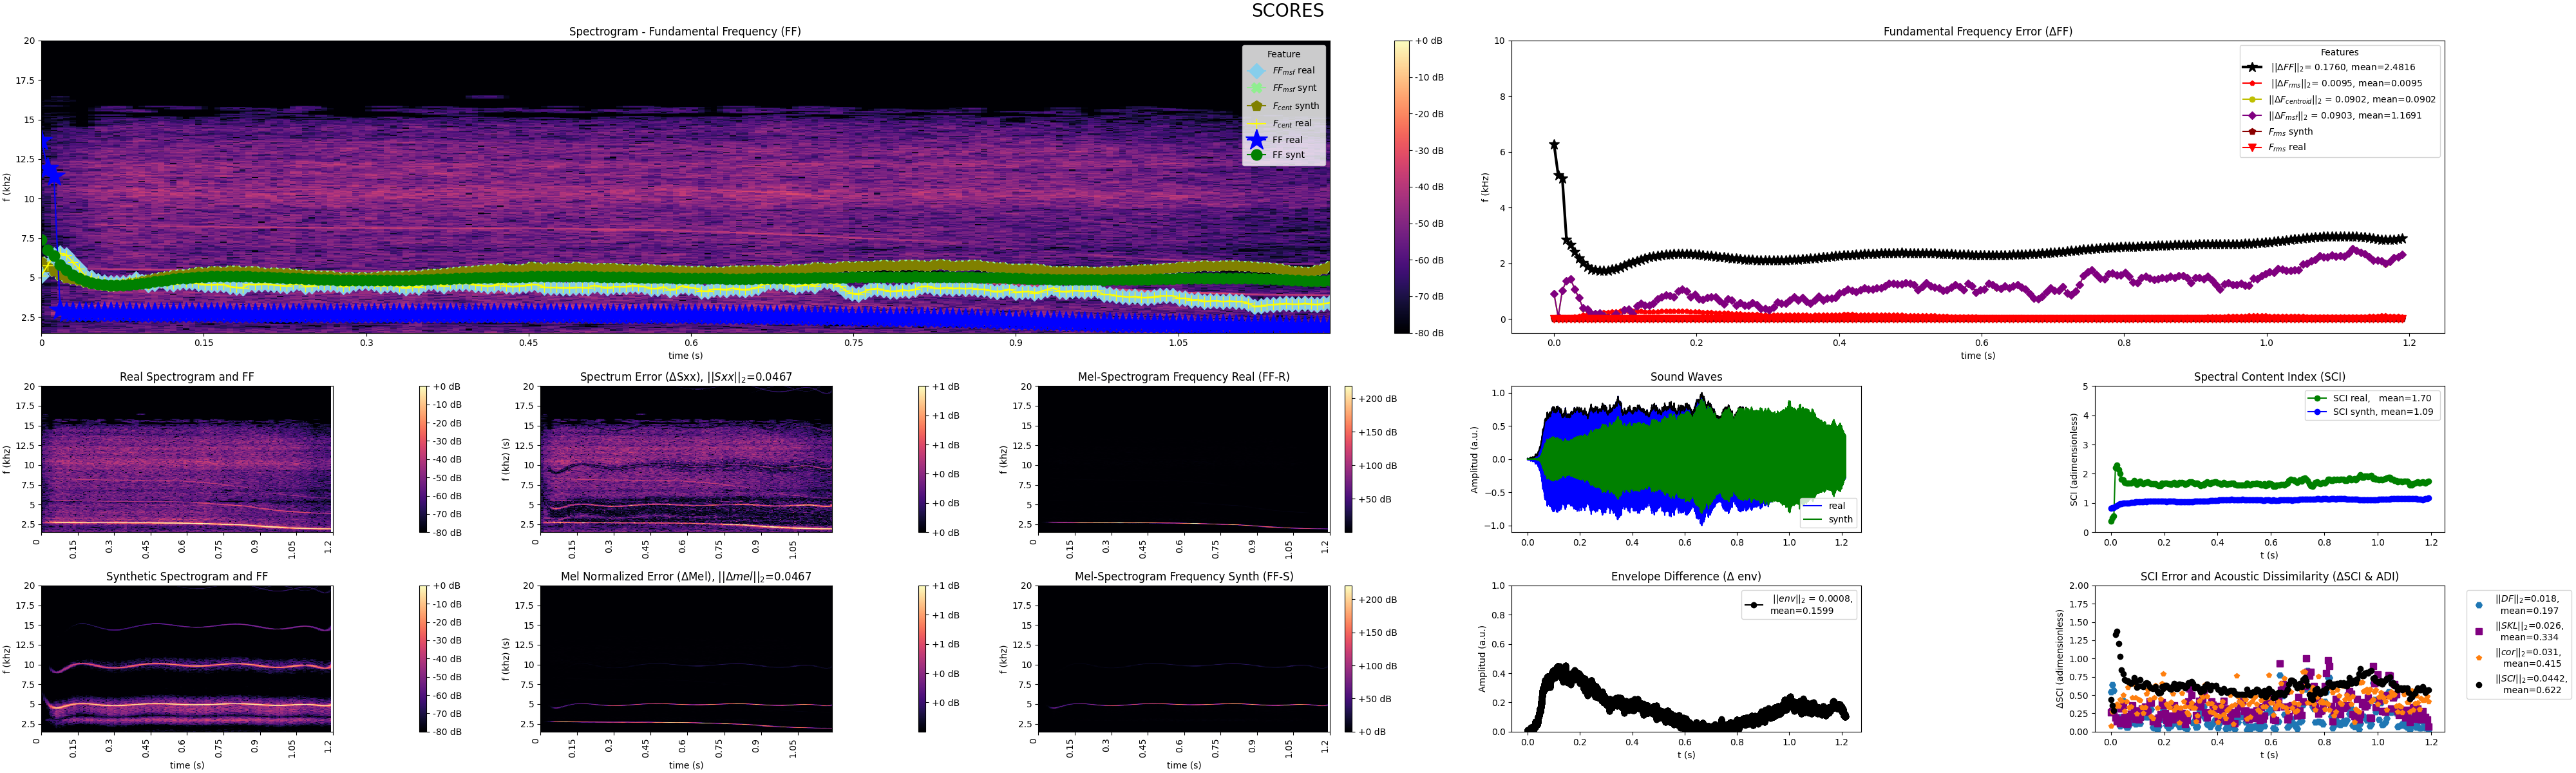

In [8]:
syllable.p["a0"].set(value=.0)
syllable.p["b0"].set(value=.3)
syllable_synth = syllable.Solve(syllable.p)
# Display(syllable.p)

ploter.PlotVs(syllable_synth)
ploter.PlotAlphaBeta(syllable_synth)
ploter.Syllables(syllable, syllable_synth)
ploter.Result(syllable, syllable_synth)

AudioPlay(syllable_synth)

In [ ]:
# syllable.p["a0"].set(value=0)
# syllable.p["a1"].set(value=0)
# syllable.p["a2"].set(value=0)
syllable.p["b0"].set(value=0.2)
# syllable.p["b1"].set(value=0)
# syllable.p["b2"].set(value=0)

syllable_synth = syllable.Solve(syllable.p)

ploter.PlotVs(syllable_synth)
ploter.PlotAlphaBeta(syllable_synth)
ploter.Syllables(syllable, syllable_synth)
# ploter.Result(birdsong.syllable, syllable_synth)

AudioPlay(syllable_synth)

In [ ]:
birdsong.syllable.p["a0"].set(value=0)
birdsong.syllable.p["a1"].set(value=0)
birdsong.syllable.p["a2"].set(value=0)
birdsong.syllable.p["b0"].set(value=0)
birdsong.syllable.p["b1"].set(value=0)
birdsong.syllable.p["b2"].set(value=0)

syllable_synth = birdsong.syllable.Solve(birdsong.syllable.p)

ploter.PlotVs(syllable_synth)
ploter.PlotAlphaBeta(syllable_synth)
ploter.Syllables(birdsong.syllable, syllable_synth)
ploter.Result(birdsong.syllable, syllable_synth)

AudioPlay(syllable_synth)

### Medium

$ a_0 = 0.11 $

In [ ]:
syllable.p["a0"].set(value=0.11)
syllable_synth = syllable.Solve(syllable.p)

ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)
AudioPlay(syllable_synth)

In [ ]:
np.array(syllable.Vs)[:,4]

In [ ]:
# syllable.time

### High

$ a_0 = 1.25 $

In [ ]:
syllable.p["a0"].set(value=1.25)
syllable_synth = syllable.Solve(syllable.p)

ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)
AudioPlay(syllable_synth)

In [ ]:
# syllable.WriteAudio();
# syllable_synth.WriteAudio();